<a href="https://colab.research.google.com/github/1y33/Binary_Classification/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import requests
from pathlib import Path

#Helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [35]:
#Creating data to work with
n_samples=2000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=32)

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=36
)

In [21]:
#Creating our model
class CirclesModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=16)
    self.layer_2=nn.Linear(in_features=16,out_features=32)
    self.layer_3=nn.Linear(in_features=32,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model=CirclesModel()
model

CirclesModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [22]:
#Optimizer and Loss functino
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)
loss_fn=nn.BCEWithLogitsLoss()

In [28]:
#Training and testing the model
epochs=50000
torch.manual_seed(36)

for epoch in range(epochs):
  model.train()
  y_logits=model(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits=model(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_preds,y_test)

  if epoch % 1000 == 0 :
    print(f"Epoch:{epoch}| Loss:{loss}| Test loss:{test_loss}")

Epoch:0| Loss:0.0020357698667794466| Test loss:0.4965564012527466
Epoch:1000| Loss:0.0015405942685902119| Test loss:0.4965564012527466
Epoch:2000| Loss:0.0012295747874304652| Test loss:0.4965564012527466
Epoch:3000| Loss:0.0010181989055126905| Test loss:0.4965564012527466
Epoch:4000| Loss:0.0008658443111926317| Test loss:0.4965564012527466
Epoch:5000| Loss:0.0007509235292673111| Test loss:0.4965564012527466
Epoch:6000| Loss:0.0006614522426389158| Test loss:0.4965564012527466
Epoch:7000| Loss:0.0005900474498048425| Test loss:0.4965564012527466
Epoch:8000| Loss:0.0005318487528711557| Test loss:0.4965564012527466
Epoch:9000| Loss:0.00048356782644987106| Test loss:0.4965564012527466
Epoch:10000| Loss:0.0004428692045621574| Test loss:0.4965564012527466
Epoch:11000| Loss:0.00040813611121848226| Test loss:0.4965564012527466
Epoch:12000| Loss:0.0003782036656048149| Test loss:0.4965564012527466
Epoch:13000| Loss:0.00035217366530559957| Test loss:0.4965564012527466
Epoch:14000| Loss:0.0003293314

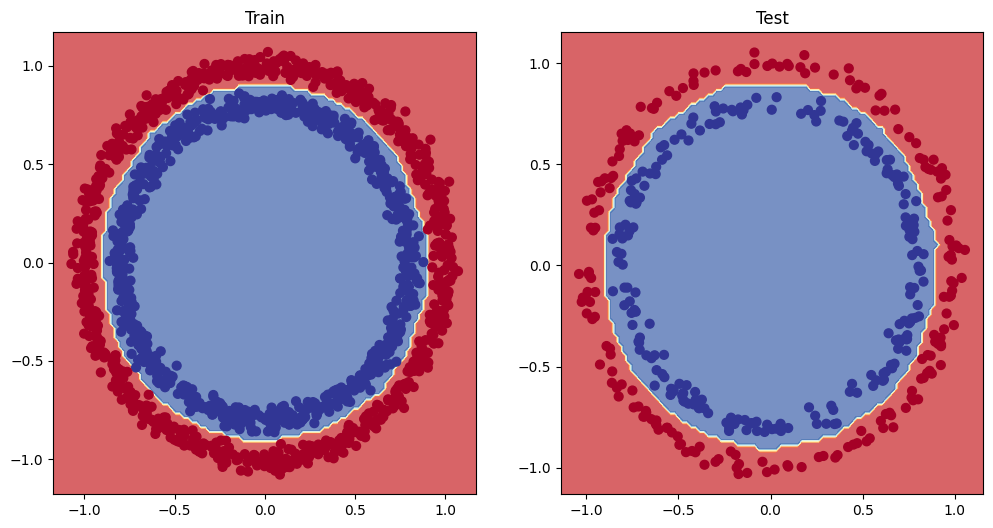

In [36]:
#Lets see our data :D
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)

In [ ]:
#Here you can save and load your model if you want

In [32]:
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="CirclesModel"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model,f=MODEL_SAVE_PATH)

In [33]:
model_loaded=CirclesModel()
model_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))